In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 

In [8]:
from datetime import datetime

In [2]:
pd.set_option("display.max.columns", None)
df=pd.read_csv("LOG.csv")

In [3]:
df.head()

,Timestamp,A1,A2,A3,A4,Code
0,12:30:23,-4.97,-5.52,-8.45,-5.52,-0.49
1,12:31:30,-4.10,-4.47,-5.00,-4.47,2.93
2,12:32:37,-3.32,-8.99,-9.57,-8.99,-1.54
3,12:33:44,-2.54,-7.73,-6.01,-7.73,1.97
4,12:40:26,-4.30,2.96,192.00,5.48,200.00


In [4]:
df

,Timestamp,A1,A2,A3,A4,Code
0,12:30:23,-4.97,-5.52,-8.45,-5.52,-0.49
1,12:31:30,-4.10,-4.47,-5.00,-4.47,2.93
2,12:32:37,-3.32,-8.99,-9.57,-8.99,-1.54
3,12:33:44,-2.54,-7.73,-6.01,-7.73,1.97
4,12:40:26,-4.30,2.96,192.00,5.48,200.00
...,...,...,...,...,...,...
83,14:03:04,-3.32,2.50,4.64,2.50,1.80
84,14:04:11,-2.54,2.53,4.66,2.53,1.05
85,14:05:18,-4.40,2.50,4.70,2.50,0.33
86,14:06:25,-3.40,3.50,100.00,3.50,115.00


In [12]:
def is_before_1pm(timestamp):
    time = datetime.strptime(timestamp, "%H:%M:%S")
    return time.hour < 13

In [13]:
for row in df:
        timestamp = row[0]  # Assuming the timestamp is in the first column
        if is_before_1pm(timestamp):
            print(row)  # Print the entire row or extract specific data as needed

TypeError: strptime() takes exactly 2 arguments (1 given)

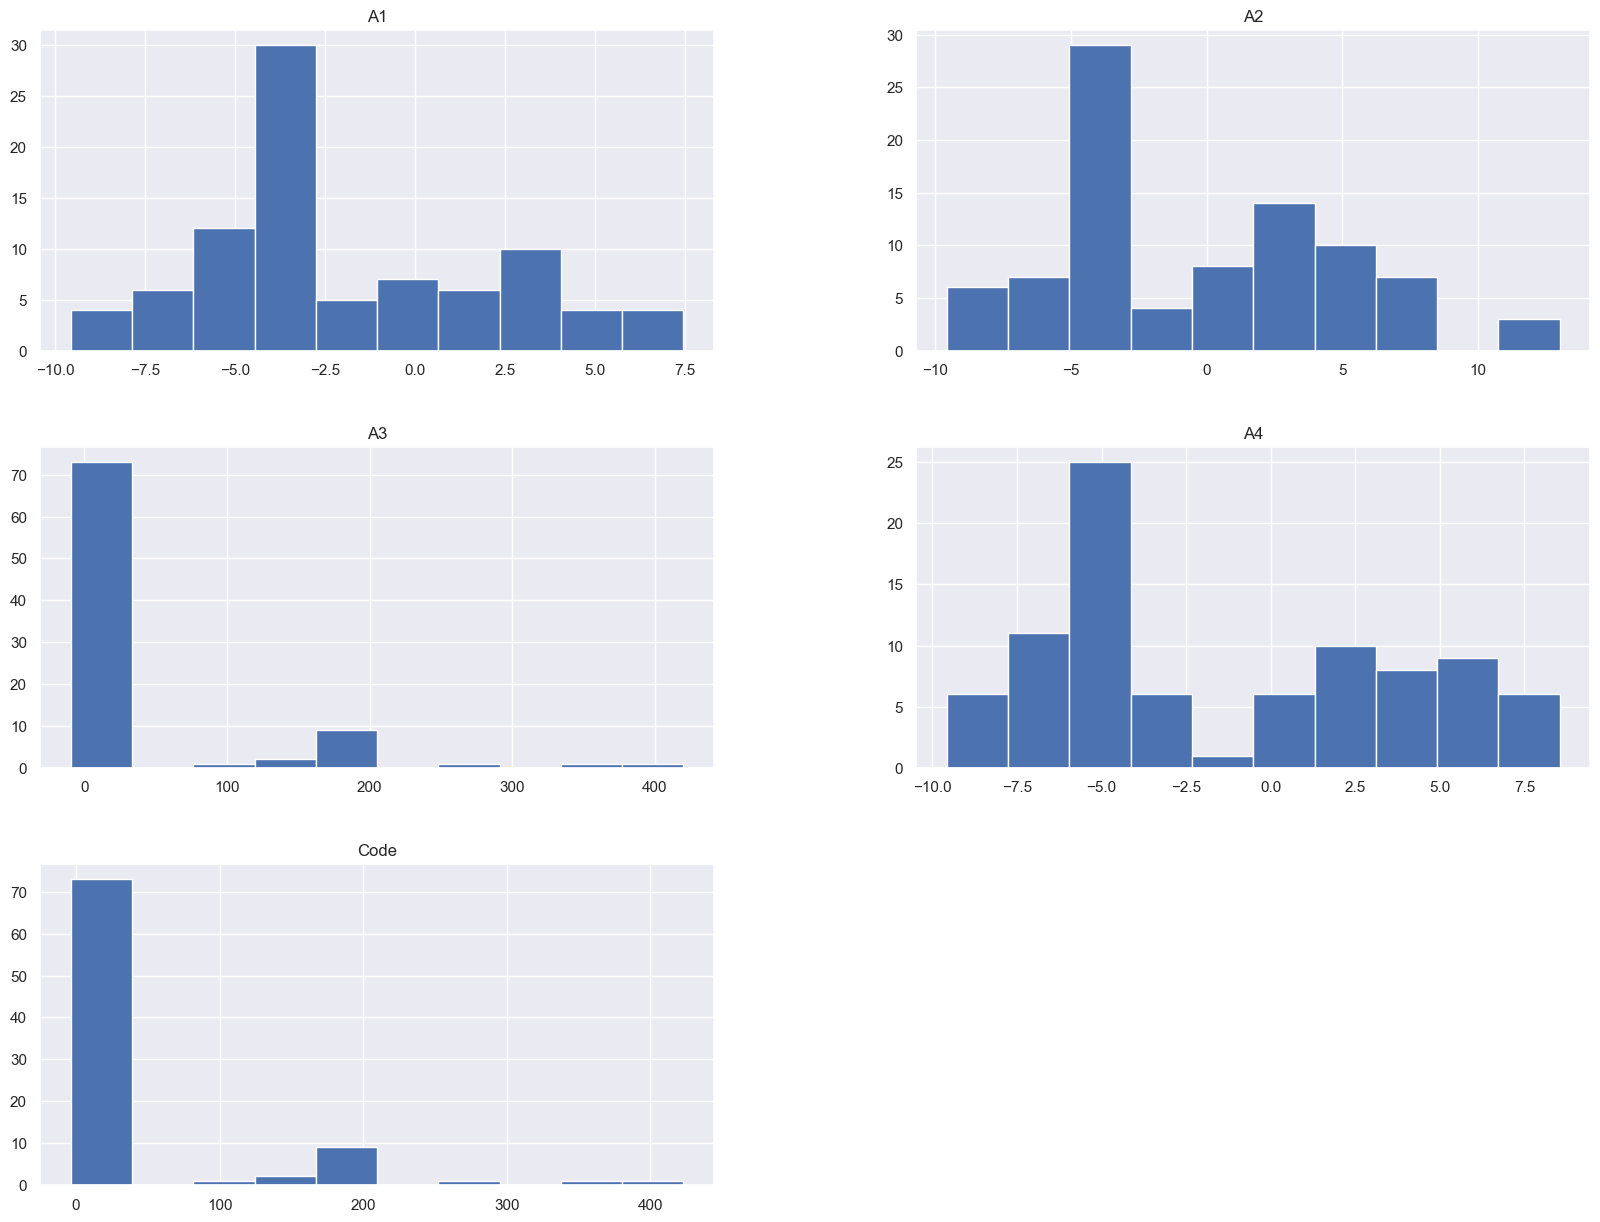

In [15]:
sns.set()
df.hist(figsize=(20,15))
plt.show()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,88.0,-2.184886,4.067740,-9.57,-4.4325,-4.100,1.3025,7.45
A2,88.0,-0.568750,5.247147,-9.57,-4.4000,-2.540,3.4850,13.00
A3,88.0,33.871136,83.935911,-9.57,-4.3100,0.800,4.6000,420.00
A4,88.0,-1.194205,5.229737,-9.57,-4.9775,-3.710,3.4850,8.54
Code,88.0,37.786023,85.076816,-3.67,0.6700,2.575,6.3475,423.00


In [20]:
df.Code

0      -0.49
1       2.93
2      -1.54
3       1.97
4     200.00
       ...  
83      1.80
84      1.05
85      0.33
86    115.00
87    192.00
Name: Code, Length: 88, dtype: float64

In [21]:
df.Timestamp 

0     12:30:23
1     12:31:30
2     12:32:37
3     12:33:44
4     12:40:26
        ...   
83    14:03:04
84    14:04:11
85    14:05:18
86    14:06:25
87    14:07:32
Name: Timestamp, Length: 88, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  88 non-null     object 
 1   A1         88 non-null     float64
 2   A2         88 non-null     float64
 3   A3         88 non-null     float64
 4   A4         88 non-null     float64
 5   Code       88 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.2+ KB


In [33]:
(df.Timestamp< "14:00:00")

0      True
1      True
2      True
3      True
4      True
      ...  
83    False
84    False
85    False
86    False
87    False
Name: Timestamp, Length: 88, dtype: bool

In [34]:
df['Crack'] = (df.Timestamp< "14:00:00")

In [35]:
df.head()

,Timestamp,A1,A2,A3,A4,Code,Crack
0,12:30:23,-4.97,-5.52,-8.45,-5.52,-0.49,True
1,12:31:30,-4.10,-4.47,-5.00,-4.47,2.93,True
2,12:32:37,-3.32,-8.99,-9.57,-8.99,-1.54,True
3,12:33:44,-2.54,-7.73,-6.01,-7.73,1.97,True
4,12:40:26,-4.30,2.96,192.00,5.48,200.00,True


In [36]:
df.corr()

,A1,A2,A3,A4,Code,Crack
A1,1.000000,-0.410243,-0.137501,-0.457922,-0.133292,0.122272
A2,-0.410243,1.000000,0.662424,0.915130,0.652519,-0.238435
A3,-0.137501,0.662424,1.000000,0.629140,0.997935,-0.033263
A4,-0.457922,0.915130,0.629140,1.000000,0.623452,-0.252863
Code,-0.133292,0.652519,0.997935,0.623452,1.000000,-0.026331
Crack,0.122272,-0.238435,-0.033263,-0.252863,-0.026331,1.000000
